In [19]:
#Нейро-нечеткие системы
#Лабораторная работа №3
# https://www.kaggle.com/dinhanhx/studentgradepassorfailprediction
#Задача: классификация данных

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *

In [2]:
#оригинальный датасет
df = pd.read_csv("pokedex.csv", delimiter=",")
df = df.select_dtypes(include=['number'])
df = df.fillna(0)
df.head(10)

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,1,2,0.7,6.9,2,318.0,45.0,49.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,1,2,1.0,13.0,2,405.0,60.0,62.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,1,2,2.0,100.0,2,525.0,80.0,82.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,1,2,2.4,155.5,1,625.0,80.0,100.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,1,1,0.6,8.5,2,309.0,39.0,52.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,1,1,1.1,19.0,2,405.0,58.0,64.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,6,1,2,1.7,90.5,2,534.0,78.0,84.0,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,7,6,1,2,1.7,110.5,1,634.0,78.0,130.0,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,8,6,1,2,1.7,100.5,1,634.0,78.0,104.0,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,9,7,1,1,0.5,9.0,2,314.0,44.0,48.0,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [3]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('Unnamed: 0', 'pokedex_number', 'generation', 'type_number', 'heig…

In [4]:
x = df.drop([yselect.value], axis = 1).copy()
x.head(10)

,Unnamed: 0,pokedex_number,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,2,0.7,6.9,2,318.0,45.0,49.0,49.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,2,1.0,13.0,2,405.0,60.0,62.0,63.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,2,2.0,100.0,2,525.0,80.0,82.0,83.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,2,2.4,155.5,1,625.0,80.0,100.0,123.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,1,0.6,8.5,2,309.0,39.0,52.0,43.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,1,1.1,19.0,2,405.0,58.0,64.0,58.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,6,2,1.7,90.5,2,534.0,78.0,84.0,78.0,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,7,6,2,1.7,110.5,1,634.0,78.0,130.0,111.0,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,8,6,2,1.7,100.5,1,634.0,78.0,104.0,78.0,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,9,7,1,0.5,9.0,2,314.0,44.0,48.0,65.0,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [5]:
y = df[yselect.value].copy()
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: generation, dtype: int64

In [6]:
#разбиваем на две части, для обучения и для тестирования
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
# test_size=1/60

In [7]:
def RandomForestN(depth):
    pltx = []
    plty = []

    for depth in range(1, 40):
        model = RandomForestClassifier (max_depth = depth).fit(x_train, y_train)
        y_get = model.predict(x_test) # прогнозирование новых выборок
        plty.append(sklearn.metrics.accuracy_score(y_test, y_get))  # точность подмнож
        pltx.append(depth)

    plt.plot(pltx, plty)
    plt.grid()
    plt.show()

    m_depth = pltx[plty.index(max(plty))]
    pl = plot_confusion_matrix(model, x_test, y_test)  
    mp = plot_roc_curve(model, x_test, y_test)  
    n_classes = len(pl.display_labels)
    
    print(f1_score(y_test, y_get, average='weighted'))
    print(recall_score(y_test, y_get, average='weighted'))
    print(precision_score(y_test, y_get, average='weighted'))
    

interactive(children=(IntSlider(value=3, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

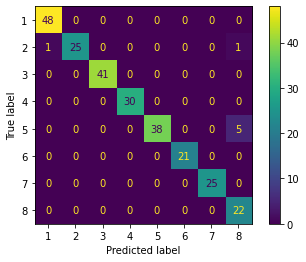

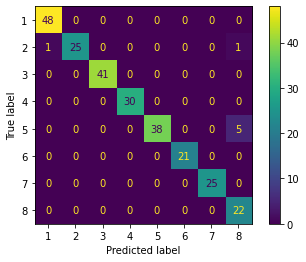

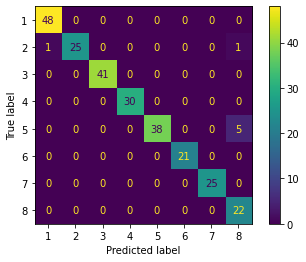

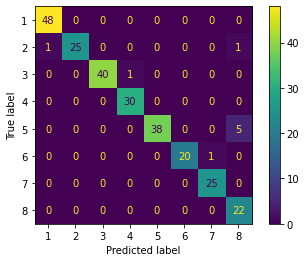

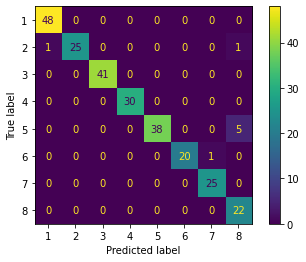

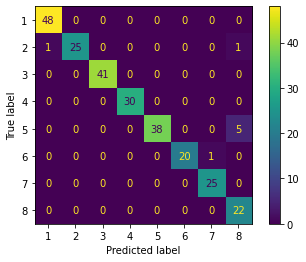

In [8]:
interactive_plot = interactive(RandomForestN, depth=(1, 5))
display(interactive_plot)

In [11]:
def GradienN(depth): 
    pltx = []
    plty = []

    for d in range(1, depth):
        model = sklearn.ensemble.GradientBoostingClassifier(max_depth = d)
        y_get = model.fit(x_train, y_train).predict(x_test)
        plty.append(sklearn.metrics.accuracy_score(y_test, y_get))
        pltx.append(d)

    plt.plot(pltx, plty)
    plt.grid()
    plt.show()

    m_depth = pltx[plty.index(max(plty))]
    pl = plot_confusion_matrix(model, x_test, y_test)  
    mp = plot_roc_curve(model, x_test, y_test)  
    n_classes = len(pl.display_labels)
    
    print(f1_score(y_test, y_get, average='weighted'))
    print(recall_score(y_test, y_get, average='weighted'))
    print(precision_score(y_test, y_get, average='weighted'))

interactive(children=(IntSlider(value=6, description='depth', max=10, min=2), Output()), _dom_classes=('widget…

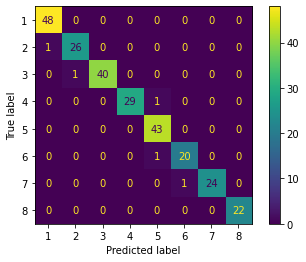

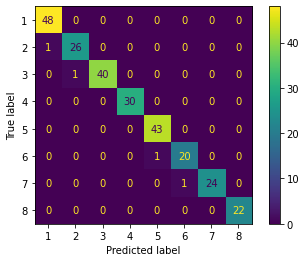

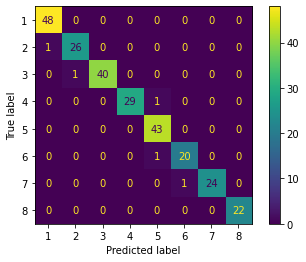

In [14]:
interactive_plot = interactive(GradienN,depth=(2, 10))
display(interactive_plot)